# Funções de Pertinência para Lógica Fuzzy

## Implementac¸ao de Funcões de Pertinência

In [464]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Cria o diretório para salvar os gráficos, se não existir
output_dir = 'relatorio/img'
os.makedirs(output_dir, exist_ok=True)

### Garu de Pertinência

In [465]:
### Função Membership
def calculate_membership(dominio, types, params):
    """
    Calcula os graus de pertinência para os valores em intervalos com base nos tipos e parâmetros fornecidos.

    :param dominio: Tupla (min, max) definindo o intervalo do domínio.
    :param types: Lista de strings indicando os tipos de funções de pertinência.
    :param params: Lista de listas com os parâmetros para cada função de pertinência.
    :return: Lista de listas com os graus de pertinência para cada tipo.
    """
    x = np.linspace(dominio[0], dominio[1], 100)  # Gera os valores de x no domínio
    results = []
    for func_type, func_params in zip(types, params):
        
        # Calcula os graus de pertinência com base no tipo de função
        if func_type == 'linear':
            results.append([linear_function(val, *func_params) for val in x])  
        elif func_type == 'triangular':
            results.append([triangular(val, *func_params) for val in x])
        elif func_type == 'trapezoidal':
            results.append([trapezoidal(val, *func_params) for val in x])
        elif func_type == 'gaussian':
            results.append([gaussian(val, *func_params) for val in x])
        elif func_type == 'sigmoidal':
            results.append([sigmoidal(val, *func_params) for val in x])
        elif func_type == 'z':
            results.append([z_function(val, *func_params) for val in x])
        elif func_type == 's':
            results.append([s_function(val, *func_params) for val in x])
        elif func_type == 'pi':
            results.append([pi_function(val, *func_params) for val in x])
        elif func_type == 'bell':
            results.append([bell_function(val, *func_params) for val in x])
        elif func_type == 'singleton':
            results.append([singleton_function(val, *func_params) for val in x])
        elif func_type == 'cauchy':
            results.append([cauchy_function(val, *func_params) for val in x])
        elif func_type == 'double_gaussian':
            results.append([double_gaussian(val, *func_params) for val in x])
        elif func_type == 'retangular':
            results.append([rectangular_function(val, *func_params) for val in x])
        elif func_type == 'logaritmica':
            results.append([logarithmic_function(val, *func_params) for val in x])
        else:
            raise ValueError(f"Tipo de função desconhecido: {func_type}")

    return x, results


### Plot 

In [466]:
### Função Plot Resultados
# Plotando os resultados
import matplotlib.pyplot as plt
import numpy as np

def plot_membership(x, u, label):
    """
    Plota as funções de pertinência com base nos intervalos, resultados e classificações fornecidos.

    :param intervalos: Lista de tuplas (min, max) definindo os intervalos de cada função.
    :param results: Lista de listas com os graus de pertinência calculados.
    :param classificacao: Lista de nomes descritivos para cada função de pertinência.
    """
    plt.figure(figsize=(10, 6))

    for i, result in enumerate(u):
        plt.plot(x, result, label=f"{label[i]}")

    plt.legend()
    plt.title("Funções de Pertinência")
    plt.xlabel("x")
    plt.ylabel("Grau de Pertinência")
    plt.grid()
    plt.show()

### 1. Função Triangular

In [467]:
def triangular(x, a, b, c):
    if a <= x < b:
        return (x - a) / (b - a)
    elif b <= x < c:
        return (c - x) / (c - b)
    else:
        return 0

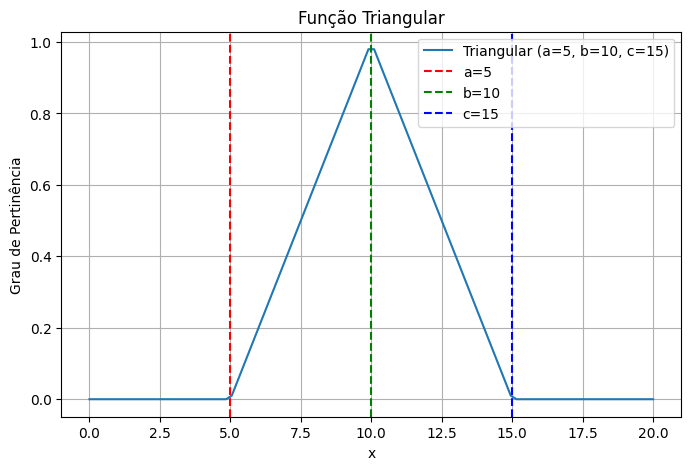

In [468]:
# Exemplo de plotagem para a função triangular
a, b, c = 5, 10, 15  # Parâmetros da função triangular
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [triangular(val, a, b, c) for val in x]

# Plotando a função triangular
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Triangular (a={a}, b={b}, c={c})")
plt.title("Função Triangular")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(a, color='red', linestyle='--', label=f"a={a}")
plt.axvline(b, color='green', linestyle='--', label=f"b={b}")
plt.axvline(c, color='blue', linestyle='--', label=f"c={c}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/triangular.png')
plt.show()

### 2. Função Trapezoidal

In [469]:
def trapezoidal(x, a, b, c, d):
    if a <= x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    elif c < x <= d:
        return (d - x) / (d - c)
    else:
        return 0

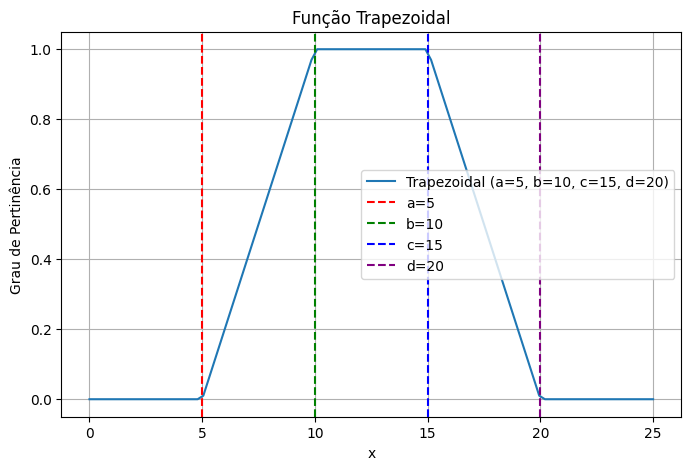

In [470]:
# Exemplo de plotagem para a função trapezoidal
a, b, c, d = 5, 10, 15, 20  # Parâmetros da função trapezoidal
x = np.linspace(0, 25, 100)  # Valores de x no intervalo [0, 25]

# Calcula os graus de pertinência
y = [trapezoidal(val, a, b, c, d) for val in x]

# Plotando a função trapezoidal
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Trapezoidal (a={a}, b={b}, c={c}, d={d})")
plt.title("Função Trapezoidal")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(a, color='red', linestyle='--', label=f"a={a}")
plt.axvline(b, color='green', linestyle='--', label=f"b={b}")
plt.axvline(c, color='blue', linestyle='--', label=f"c={c}")
plt.axvline(d, color='purple', linestyle='--', label=f"d={d}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/trapezoidal.png')
plt.show()

### 3. Função Gaussiana

In [471]:
def gaussian(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

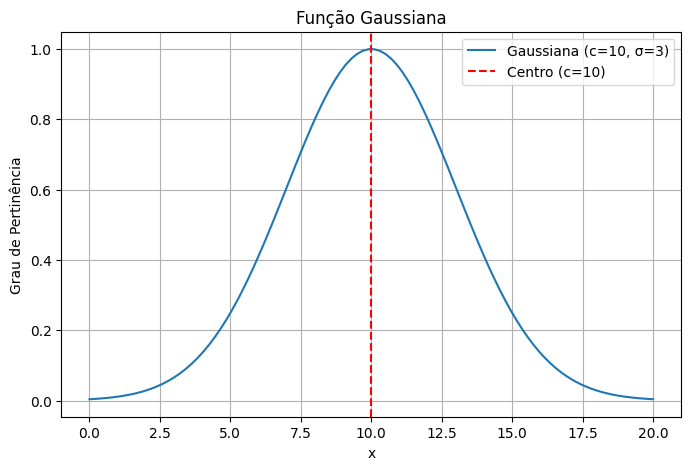

In [472]:
# Exemplo de uso
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]
c = 10  # Centro da curva (onde a pertinência é máxima)
sigma = 3  # Largura da curva

# Calcula os graus de pertinência
y = [gaussian(val, c, sigma) for val in x]

# Plotando a função gaussiana
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Gaussiana (c={c}, σ={sigma})")
plt.title("Função Gaussiana")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(c, color='red', linestyle='--', label=f"Centro (c={c})")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/gaussian.png')
plt.show()

### 4. Função Sigmoidal

In [473]:
def sigmoidal(x, a, c):
    return 1 / (1 + np.exp(-a * (x - c)))

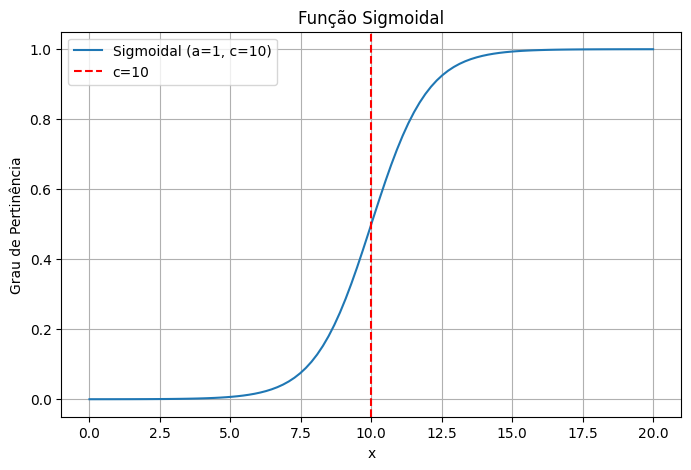

In [474]:
# Exemplo de plotagem para a função sigmoidal
a, c = 1, 10  # Parâmetros da função sigmoidal
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [sigmoidal(val, a, c) for val in x]

# Plotando a função sigmoidal
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Sigmoidal (a={a}, c={c})")
plt.title("Função Sigmoidal")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(c, color='red', linestyle='--', label=f"c={c}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/sigmoidal.png')
plt.show()

### 5. Função Sinoidal (Bell)

In [475]:
def bell_function(x, a, b, c):
    """
    Função de pertinência em forma de sino.
    :param x: Valor de entrada.
    :param a: Controla a largura do sino.
    :param b: Controla a inclinação.
    :param c: Centro do sino.
    :return: Grau de pertinência.
    """
    return 1 / (1 + abs((x - c) / a) ** (2 * b))

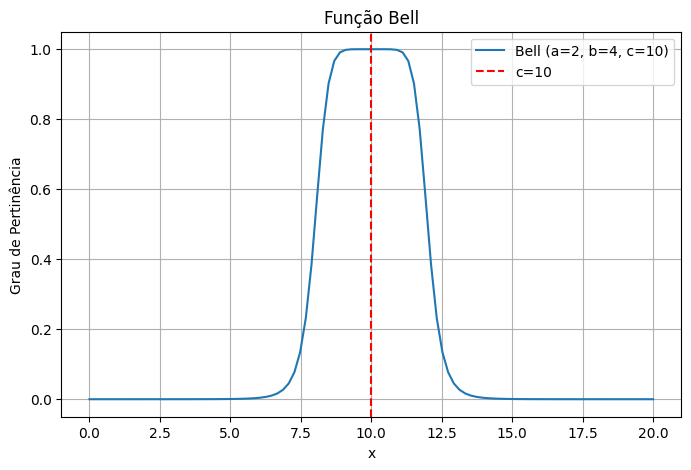

In [476]:
# Exemplo de plotagem para a função Bell
a, b, c = 2, 4, 10  # Parâmetros da função Bell
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [bell_function(val, a, b, c) for val in x]

# Plotando a função Bell
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Bell (a={a}, b={b}, c={c})")
plt.title("Função Bell")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(c, color='red', linestyle='--', label=f"c={c}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/bell.png')
plt.show()

### 6. Função S

In [477]:
def s_function(x, a, b):
    if x <= a:
        return 0
    elif a < x < b:
        return 2 * ((x - a) / (b - a)) ** 2
    elif x >= b:
        return 1

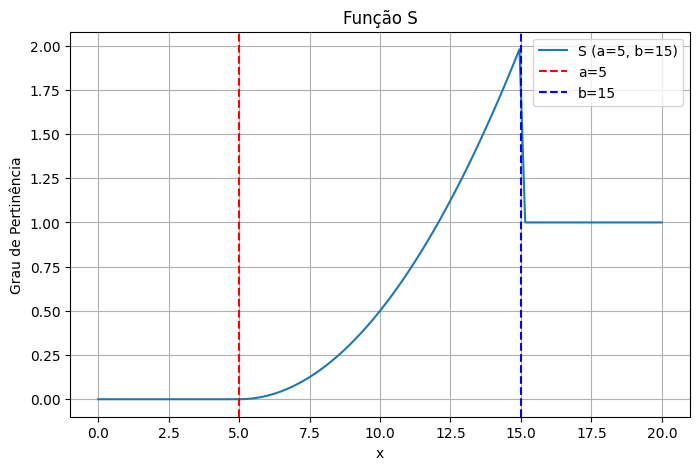

In [478]:
# Exemplo de plotagem para a função S
a, b = 5, 15  # Parâmetros da função S
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [s_function(val, a, b) for val in x]

# Plotando a função S
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"S (a={a}, b={b})")
plt.title("Função S")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(a, color='red', linestyle='--', label=f"a={a}")
plt.axvline(b, color='blue', linestyle='--', label=f"b={b}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/s.png')
plt.show()

### 7. Função Z

In [479]:
def z_function(x, a, b):
    if x <= a:
        return 1
    elif a < x < b:
        return 1 - 2 * ((x - a) / (b - a)) ** 2
    elif x >= b:
        return 0

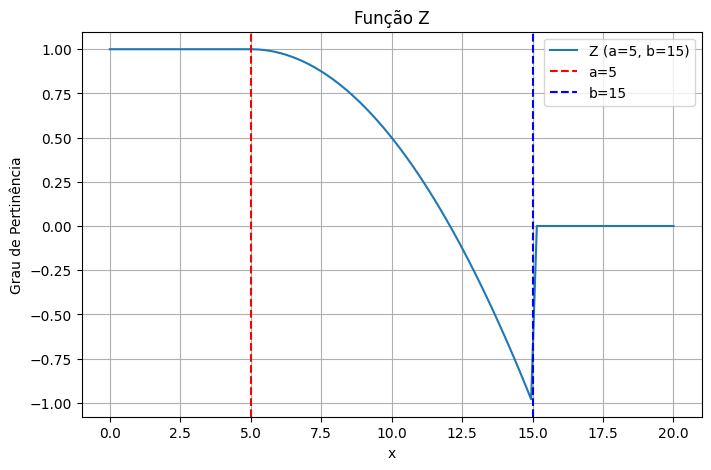

In [480]:
# Exemplo de plotagem para a função Z
a, b = 5, 15  # Parâmetros da função Z
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [z_function(val, a, b) for val in x]

# Plotando a função Z
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Z (a={a}, b={b})")
plt.title("Função Z")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(a, color='red', linestyle='--', label=f"a={a}")
plt.axvline(b, color='blue', linestyle='--', label=f"b={b}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/z.png')
plt.show()

### 8. Função Cauchy

In [481]:
def cauchy_function(x, c, gamma):
    """
    Função de pertinência Cauchy.
    :param x: Valor de entrada.
    :param c: Centro da função.
    :param gamma: Largura da função.
    :return: Grau de pertinência.
    """
    return 1 / (1 + ((x - c) / gamma) ** 2)

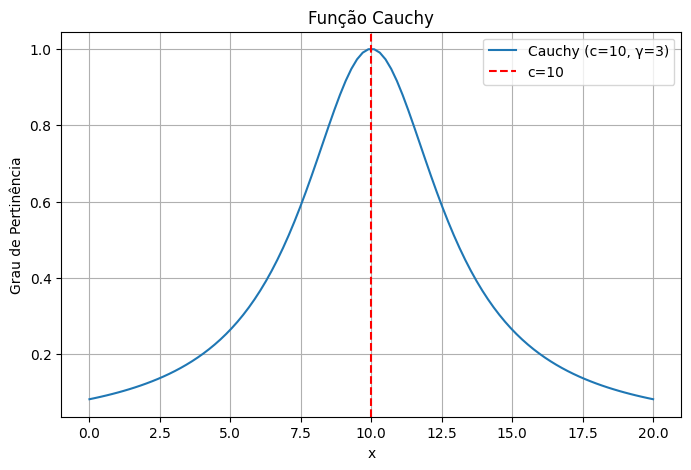

In [482]:
# Exemplo de plotagem para a função Cauchy
c, gamma = 10, 3  # Parâmetros da função Cauchy
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [cauchy_function(val, c, gamma) for val in x]

# Plotando a função Cauchy
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Cauchy (c={c}, γ={gamma})")
plt.title("Função Cauchy")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(c, color='red', linestyle='--', label=f"c={c}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/cauchy.png')
plt.show()

### 9. Função Gaussiana Dupla

In [483]:
def double_gaussian(x, c1, sigma1, c2, sigma2):
    """
    Função de pertinência Gaussiana Dupla.
    :param x: Valor de entrada.
    :param c1: Centro da primeira gaussiana.
    :param sigma1: Largura da primeira gaussiana.
    :param c2: Centro da segunda gaussiana.
    :param sigma2: Largura da segunda gaussiana.
    :return: Grau de pertinência combinado.
    """
    return np.maximum(
        np.exp(-0.5 * ((x - c1) / sigma1) ** 2),
        np.exp(-0.5 * ((x - c2) / sigma2) ** 2)
    )

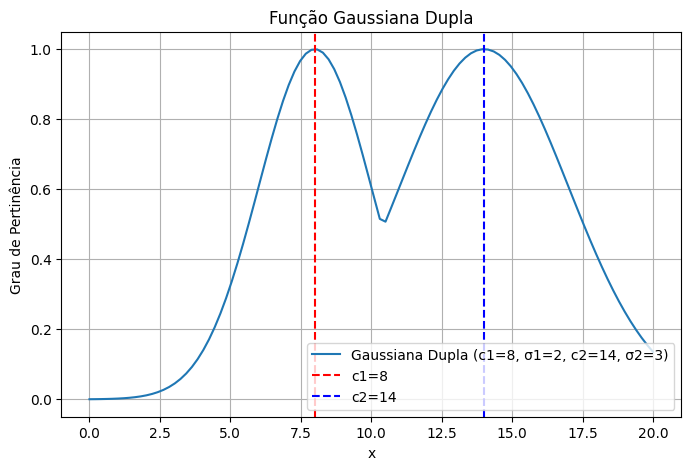

In [484]:
# Exemplo de plotagem para a função Gaussiana Dupla
c1, sigma1 = 8, 2  # Parâmetros da primeira gaussiana
c2, sigma2 = 14, 3  # Parâmetros da segunda gaussiana
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [double_gaussian(val, c1, sigma1, c2, sigma2) for val in x]

# Plotando a função Gaussiana Dupla
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Gaussiana Dupla (c1={c1}, σ1={sigma1}, c2={c2}, σ2={sigma2})")
plt.title("Função Gaussiana Dupla")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(c1, color='red', linestyle='--', label=f"c1={c1}")
plt.axvline(c2, color='blue', linestyle='--', label=f"c2={c2}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/double_gaussian.png')
plt.show()

### 10. Função Retangular

In [485]:
def rectangular_function(x, a, b):
    """
    Função de pertinência retangular.
    :param x: Valor de entrada.
    :param a: Início do intervalo.
    :param b: Fim do intervalo.
    :return: Grau de pertinência.
    """
    return 1 if a <= x <= b else 0

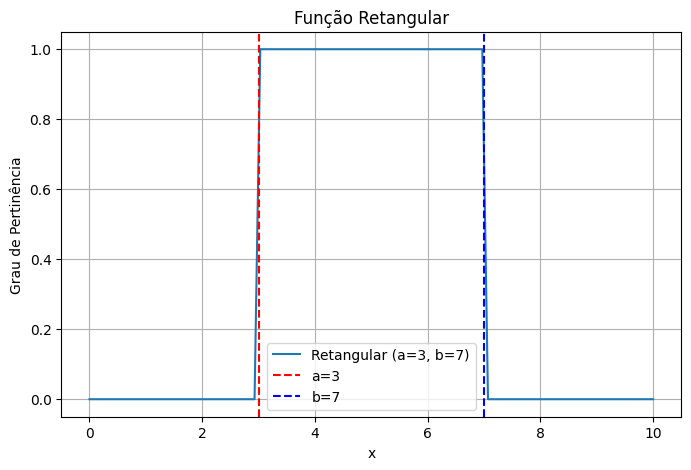

In [486]:
# Exemplo de plotagem para a função Retangular
a, b = 3, 7  # Parâmetros da função Retangular
x = np.linspace(0, 10, 100)  # Valores de x no intervalo [0, 10]
y_retangular = [rectangular_function(val, a, b) for val in x]  # Calcula os graus de pertinência

plt.figure(figsize=(8, 5))
plt.plot(x, y_retangular, label=f"Retangular (a={a}, b={b})")
plt.title("Função Retangular")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(a, color='red', linestyle='--', label=f"a={a}")
plt.axvline(b, color='blue', linestyle='--', label=f"b={b}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/rectangular.png')
plt.show()

### 11. Função logarítmica

In [487]:
def logarithmic_function(x, a, b):
    """
    Função de pertinência logarítmica.
    :param x: Valor de entrada.
    :param a: Base do logaritmo.
    :param b: Escala do logaritmo.
    :return: Grau de pertinência.
    """
    if x > 0:
        return min(1, max(0, b * np.log(x) / np.log(a)))
    return 0

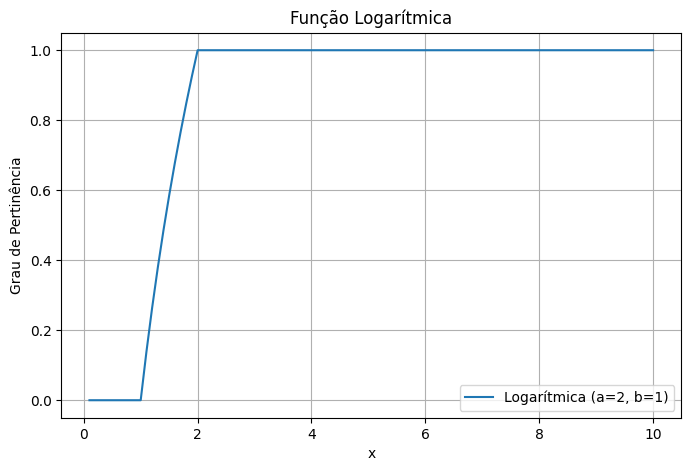

In [488]:
# Exemplo de plotagem para a função Logarítmica
a, b = 2, 1  # Parâmetros da função Logarítmica
x = np.linspace(0.1, 10, 100)  # Valores de x no intervalo [0.1, 10] (evitando zero)
y_logaritmica = [logarithmic_function(val, a, b) for val in x]  # Calcula os graus de pertinência

plt.figure(figsize=(8, 5))
plt.plot(x, y_logaritmica, label=f"Logarítmica (a={a}, b={b})")
plt.title("Função Logarítmica")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/logarithmic.png')
plt.show()


### 12. Função Pi

In [489]:
def pi_function(x, a, b, c):
    if x < b:
        return s_function(x, a, b)
    else:
        return z_function(x, b, c)

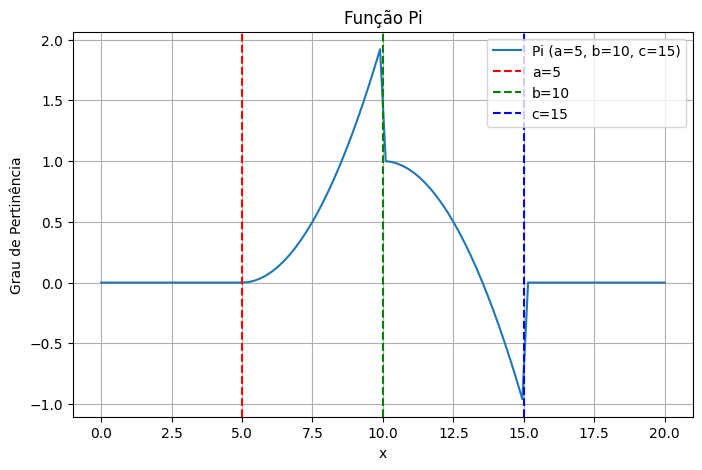

In [490]:
# Exemplo de plotagem para a função Pi
a, b, c = 5, 10, 15  # Parâmetros da função Pi
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [pi_function(val, a, b, c) for val in x]

# Plotando a função Pi
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Pi (a={a}, b={b}, c={c})")
plt.title("Função Pi")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(a, color='red', linestyle='--', label=f"a={a}")
plt.axvline(b, color='green', linestyle='--', label=f"b={b}")
plt.axvline(c, color='blue', linestyle='--', label=f"c={c}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/pi.png')
plt.show()

### 13. Função Singleton

In [491]:
def singleton_function(x, c):
    """
    Função de pertinência Singleton.
    :param x: Valor de entrada.
    :param c: Ponto onde a pertinência é máxima (1).
    :return: Grau de pertinência.
    """
    return 1 if x == c else 0

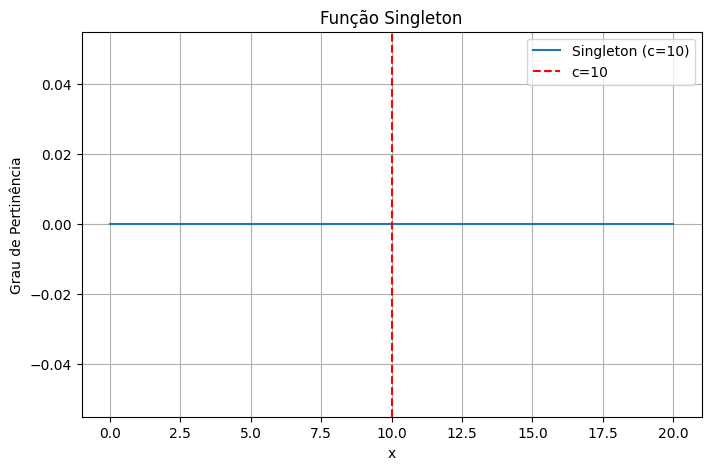

In [492]:
# Exemplo de plotagem para a função Singleton
c = 10  # Parâmetro da função Singleton
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [singleton_function(val, c) for val in x]

# Plotando a função Singleton
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Singleton (c={c})")
plt.title("Função Singleton")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(c, color='red', linestyle='--', label=f"c={c}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/singleton.png')
plt.show()

### 14. Função Linear

In [493]:
def linear_function(x, a, b):
    """
    Função de pertinência linear crescente ou decrescente.
    :param x: Valor de entrada.
    :param a: Início do intervalo.
    :param b: Fim do intervalo.
    :return: Grau de pertinência.
    """
    if x <= a:
        return 0
    elif x >= b:
        return 1
    else:
        return (x - a) / (b - a)

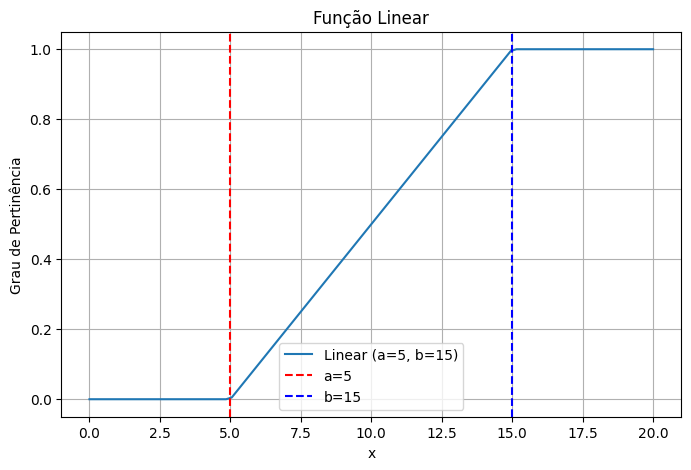

In [494]:
# Exemplo de plotagem para a função Linear
a, b = 5, 15  # Parâmetros da função Linear
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [linear_function(val, a, b) for val in x]

# Plotando a função Linear
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Linear (a={a}, b={b})")
plt.title("Função Linear")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(a, color='red', linestyle='--', label=f"a={a}")
plt.axvline(b, color='blue', linestyle='--', label=f"b={b}")
plt.legend()
plt.grid()
plt.savefig(f'{output_dir}/linear.png')
plt.show()

## Fuzzificação e Análise Comporativa

### Gera os Parametros

In [495]:
def generate_params(X, types, n):
    """
    Gera os parâmetros para diferentes tipos de funções de pertinência.

    Args:
        X (tuple): Intervalo do domínio (mínimo, máximo).
        types (list): Lista de tipos de funções ('gaussian', 'triangular', etc.).
        n (int): Número de funções de pertinência.

    Returns:
        list: Lista de parâmetros para cada tipo de função.
    """
    centers = np.linspace(X[0], X[1], n)  # Centros uniformemente distribuídos
    step = (X[1] - X[0]) / (n - 1) if n > 1 else (X[1] - X[0])  # Espaçamento entre os centros
    params = []

    for i, t in enumerate(types):
        if t == 'gaussian':
            sigma = step / 2  # Sigma proporcional ao espaçamento
            params.append([centers[i], sigma])
        elif t == 'triangular':
            a = max(X[0], centers[i] - step)  # Início da base
            b = centers[i]                   # Pico
            c = min(X[1], centers[i] + step)  # Fim da base
            params.append([a, b, c])
        elif t == 'trapezoidal':
            a = max(X[0], centers[i] - step)  # Início da base
            b = max(X[0], centers[i] - step / 2)  # Início do topo
            c = min(X[1], centers[i] + step / 2)  # Fim do topo
            d = min(X[1], centers[i] + step)  # Fim da base
            params.append([a, b, c, d])
        elif t == 'sigmoidal':
            a = 1  # Inclinação padrão
            c = centers[i]  # Centro
            params.append([a, c])
        elif t == 'bell':
            a = step / 2  # Largura do sino
            b = 2  # Inclinação padrão
            c = centers[i]  # Centro
            params.append([a, b, c])
        elif t == 'z':
            a = max(X[0], centers[i] - step)  # Início do decaimento
            b = centers[i]  # Fim do decaimento
            params.append([a, b])
        elif t == 's':
            a = centers[i]  # Início do crescimento
            b = min(X[1], centers[i] + step)  # Fim do crescimento
            params.append([a, b])
        elif t == 'pi':
            a = max(X[0], centers[i] - step)  # Início do crescimento
            b = centers[i]  # Pico
            c = min(X[1], centers[i] + step)  # Fim do decaimento
            params.append([a, b, c])
        elif t == 'singleton':
            c = centers[i]  # Ponto único
            params.append([c])
        elif t == 'cauchy':
            c = centers[i]  # Centro
            gamma = step / 2  # Largura
            params.append([c, gamma])
        elif t == 'double_gaussian':
            c1 = max(X[0], centers[i] - step / 2)  # Centro da primeira gaussiana
            sigma1 = step / 4  # Largura da primeira gaussiana
            c2 = min(X[1], centers[i] + step / 2)  # Centro da segunda gaussiana
            sigma2 = step / 4  # Largura da segunda gaussiana
            params.append([c1, sigma1, c2, sigma2])
        elif t == 'retangular':
            a = max(X[0], centers[i] - step / 2)  # Início do intervalo
            b = min(X[1], centers[i] + step / 2)  # Fim do intervalo
            params.append([a, b])
        elif t == 'logaritmica':
            a = 2  # Base do logaritmo
            b = 1  # Escala
            params.append([a, b])
        else:
            raise ValueError(f"Tipo de função '{t}' não suportado!")
    
    return params

### Realiza os exemplos com os parametros manual

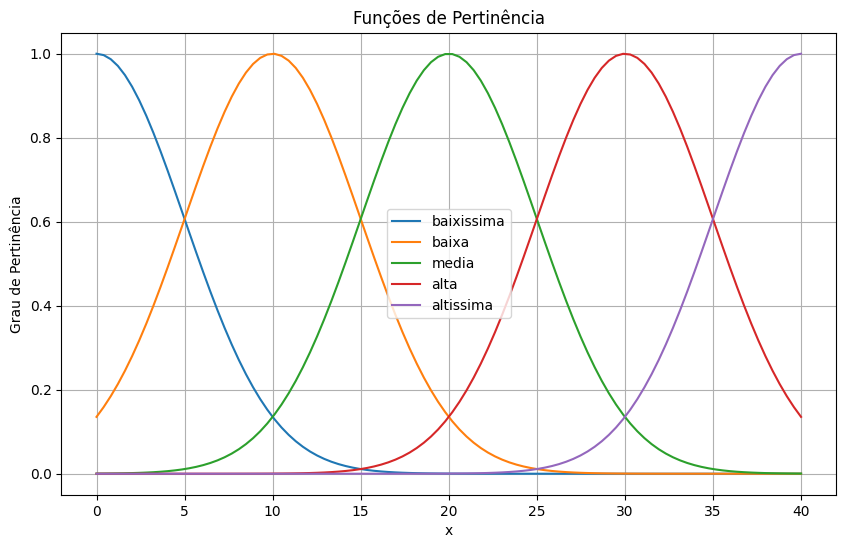

In [496]:
# Definição do domínio
X = (0, 40) 

labels = ['baixissima', 'baixa', 'media', 'alta', 'altissima']
types = ['gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian']

# Parâmetros ajustados para a função gaussiana
params = [
    [0, 5],     # Centro no meio do intervalo (-10, 10), largura controlada por sigma
    [10, 5],    # Centro no meio do intervalo (0, 20), largura controlada por sigma
    [20, 5],    # Centro no meio do intervalo (10, 30), largura controlada por sigma
    [30, 5],    # Centro no meio do intervalo (20, 40), largura controlada por sigma
    [40, 5]     # Centro no meio do intervalo (30, 50), largura controlada por sigma
]

# Função para calcular os graus de pertinência
x, u = calculate_membership(X, types, params)
# print(x,u)
# Função para plotar os resultados
plot_membership(x, u, labels)

### Realiza os exemplos com os parametros automatico

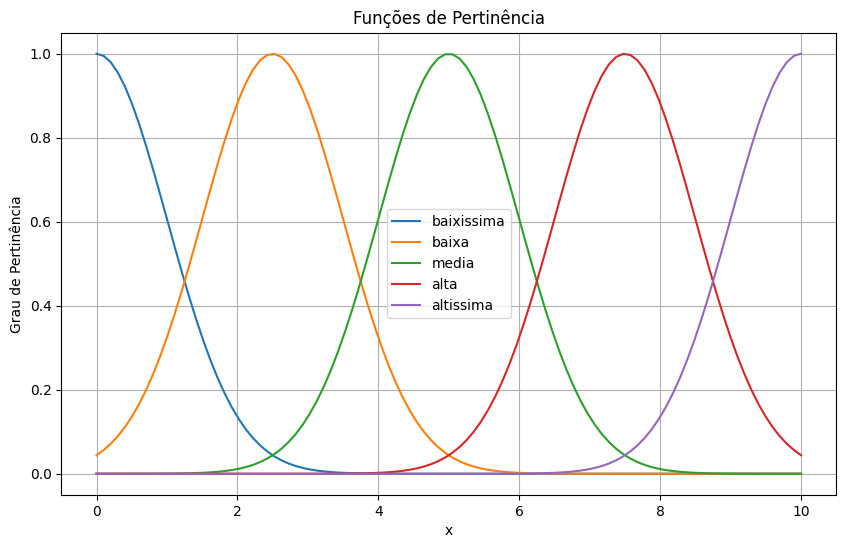

In [497]:
import numpy as np

# Definição do intervalo e número de funções
X = (0, 10)  # Intervalo do domínio

labels = ['baixissima', 'baixa', 'media', 'alta', 'altissima']
types = ['gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian']
n = len(types)       # Quantidade de funções de pertinência

# Cálculo dos centros e sigma
centers = np.linspace(X[0], X[1], n)  # Centros uniformemente distribuídos
sigma = (X[1] - X[0]) / (2 * n)       # Sigma proporcional ao espaçamento entre os centros

# Geração dos parâmetros
params = [[center, sigma] for center in centers]

# Função para calcular os graus de pertinência
x, u = calculate_membership(X, types, params)
# Função para plotar os resultados
plot_membership(x, u, labels)

### Realiza os exemplos com a função de parametros

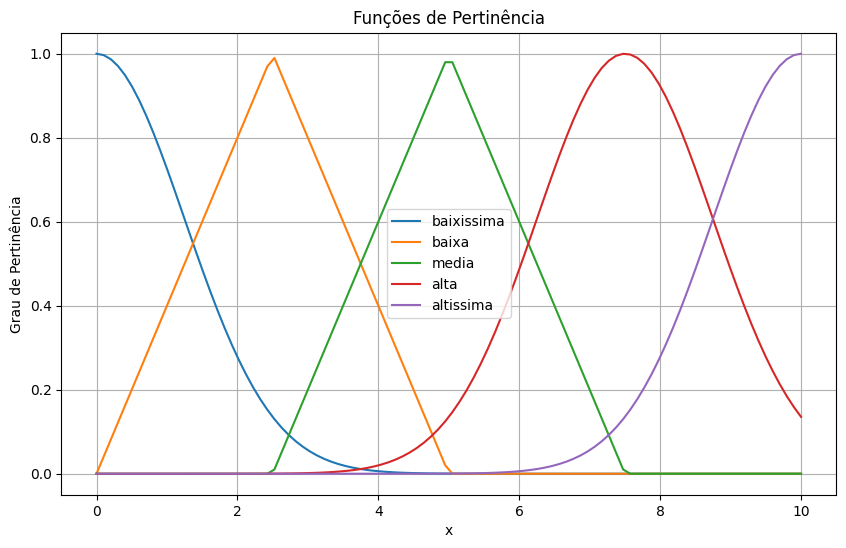

In [498]:
import numpy as np

# Definição do intervalo e número de funções
X = (0, 10)  # Intervalo do domínio

labels = ['baixissima', 'baixa', 'media', 'alta', 'altissima']
types = ['gaussian', 'triangular', 'triangular', 'gaussian', 'gaussian']
n = len(types)       # Quantidade de funções de pertinência

# Geração dos parâmetros
params = generate_params(X, types, n)

# Função para calcular os graus de pertinência
x, u = calculate_membership(X, types, params)
# Função para plotar os resultados
plot_membership(x, u, labels)

### Exemplo Professor

In [499]:
# Geração dos centros triangulares uniformemente distribuídos
n = 2  # número de atributos (variáveis de entrada)
npt = 1  # número de padrões de entrada
xt = [0.4, 0.75]  # Entrada a ser fuzzificada
m = [3, 4]  # número de funções de pertinência para cada atributo

xmin = [0, 0]  # mínimo de cada atributo
xmax = [1, 1]  # máximo de cada atributo

c = np.zeros((n, max(m)))  # Matriz para armazenar os centros

for i in range(n):
    step = (xmax[i] - xmin[i]) / (m[i] - 1)  # Cálculo do passo
    for j in range(m[i]):
        c[i, j] = xmin[i] + j * step  # Cálculo do centro

print("Centros triangulares uniformemente distribuídos:")
print(c)

Centros triangulares uniformemente distribuídos:
[[0.         0.5        1.         0.        ]
 [0.         0.33333333 0.66666667 1.        ]]


### Construindo dois atributos

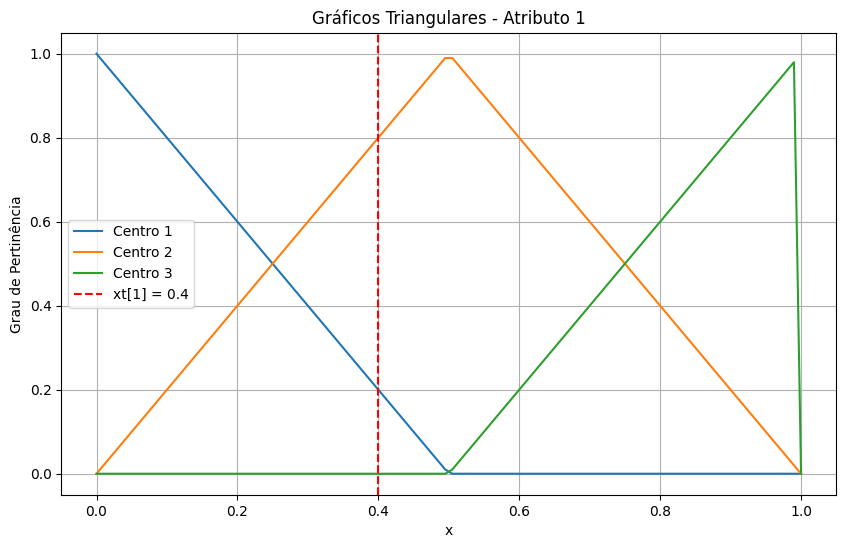

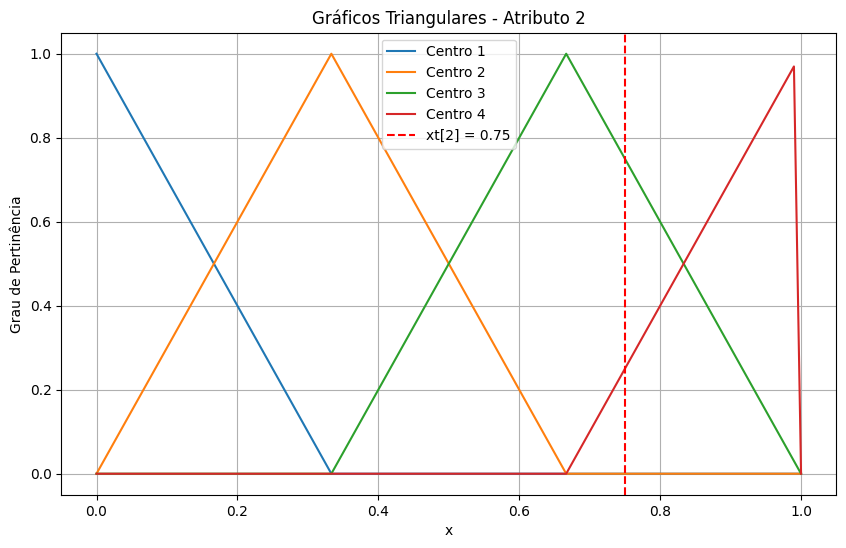

In [500]:
# Plotando gráficos separados para cada atributo com destaque para xt
x = np.linspace(0, 1, 100)  # Domínio para os gráficos

for i in range(n):
    plt.figure(figsize=(10, 6))
    for j in range(m[i]):
        # Função triangular para cada centro
        a = c[i, j - 1] if j > 0 else xmin[i]
        b = c[i, j]
        c_val = c[i, j + 1] if j < m[i] - 1 else xmax[i]
        y = [triangular(val, a, b, c_val) for val in x]
        plt.plot(x, y, label=f"Centro {j + 1}")

    # Destacando o valor de xt no gráfico
    plt.axvline(xt[i], color='red', linestyle='--', label=f"xt[{i + 1}] = {xt[i]}")

    plt.title(f"Gráficos Triangulares - Atributo {i + 1}")
    plt.xlabel("x")
    plt.ylabel("Grau de Pertinência")
    plt.legend()
    plt.grid()
    plt.show()

### Fuzzificação e Analise Comparativa com duas funções de dois atributos

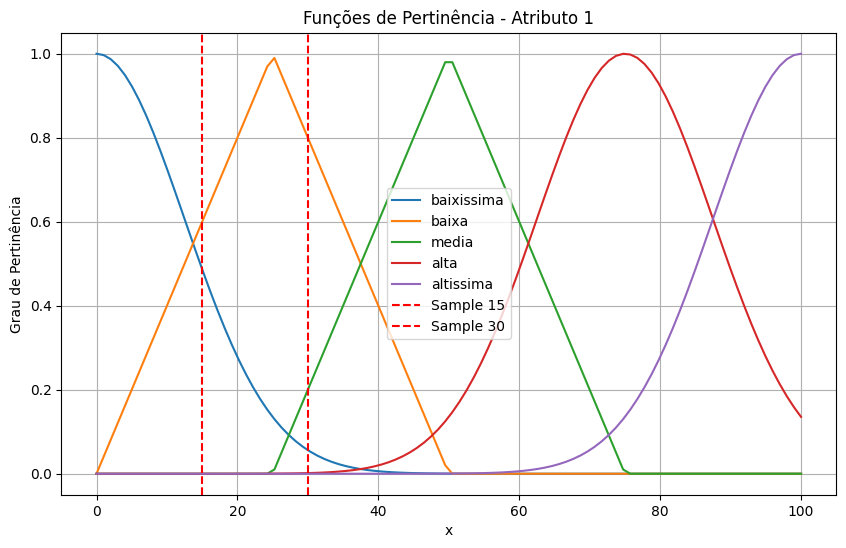

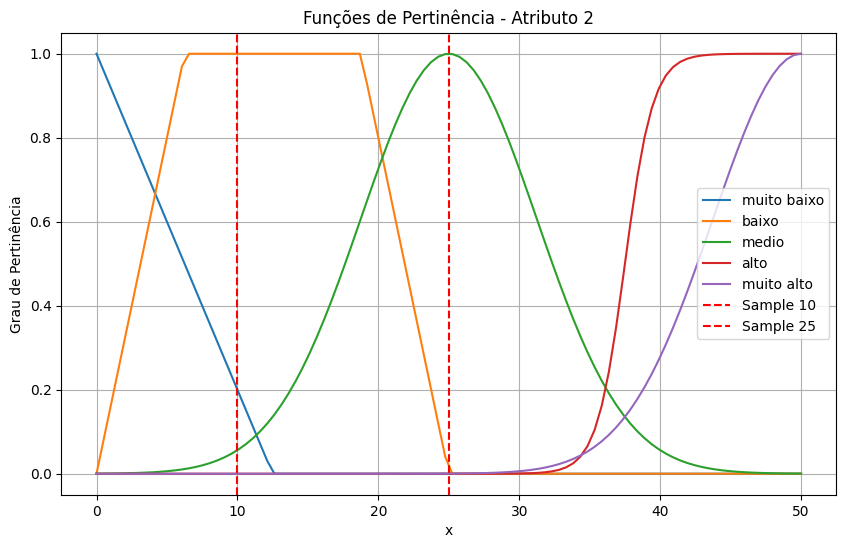

In [501]:
# Definição do domínio e amostras para dois atributos
dominio1 = (0, 100)  # Intervalo do universo de discurso para o primeiro atributo
dominio2 = (0, 50)   # Intervalo do universo de discurso para o segundo atributo
samples1 = [15, 30]  # Amostras para fuzzificação do primeiro atributo
samples2 = [10, 25]  # Amostras para fuzzificação do segundo atributo

# Definição dos rótulos e tipos de funções de pertinência para cada atributo
labels1 = ['baixissima', 'baixa', 'media', 'alta', 'altissima']
types1 = ['gaussian', 'triangular', 'triangular', 'gaussian', 'gaussian']

labels2 = ['muito baixo', 'baixo', 'medio', 'alto', 'muito alto']
types2 = ['triangular', 'trapezoidal', 'gaussian', 'sigmoidal', 'gaussian']

# Número de funções de pertinência para cada atributo
n1 = len(types1)
n2 = len(types2)

# Geração dos parâmetros para cada tipo de função
params1 = generate_params(dominio1, types1, n1)
params2 = generate_params(dominio2, types2, n2)

# Cálculo dos graus de pertinência para cada atributo
x1, results1 = calculate_membership(dominio1, types1, params1)
x2, results2 = calculate_membership(dominio2, types2, params2)


# Plotagem das funções de pertinência para o atributo 1 com as amostras
plt.figure(figsize=(10, 6))
for i, result in enumerate(results1):
    plt.plot(x1, result, label=f"{labels1[i]}")
for sample in samples1:
    plt.axvline(sample, color='red', linestyle='--', label=f"Sample {sample}")
plt.title("Funções de Pertinência - Atributo 1")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.legend()
plt.grid()
plt.show()

# Plotagem das funções de pertinência para o
plt.figure(figsize=(10, 6))
for i, result in enumerate(results2):
    plt.plot(x2, result, label=f"{labels2[i]}")
for sample in samples2:
    plt.axvline(sample, color='red', linestyle='--', label=f"Sample {sample}")
plt.title("Funções de Pertinência - Atributo 2")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.legend()
plt.grid()
plt.show()

In [502]:
import numpy as np
import matplotlib.pyplot as plt


def fuzzificacao(n, type, dominio, samples, label):

    types = [type]*n
    labels = [label]*n


    # Geração dos parâmetros para cada tipo de função
    params = generate_params(dominio, types, n)

    # Cálculo dos graus de pertinência
    x, results = calculate_membership(dominio, types, params)

    # Plotagem das funções de pertinência e ativação das amostras
    plt.figure(figsize=(12, 8))
    for i, func_type in enumerate(types):
        plt.plot(x, results[i], label=f"{labels[i]}")

        # Destacando as amostras no gráfico e calculando ativações
        for sample in samples:
            activation = results[i][np.abs(x - sample).argmin()]
            plt.scatter(sample, activation, color='red', label=f"{labels[i]} Sample {sample}: {activation:.2f}")
            print(f"Ativação para {labels[i]} com entrada {sample}: {activation:.2f}")

    plt.title(f"Funções de Pertinência e Ativação das Amostras {type}")
    plt.xlabel("Universo de Discurso")
    plt.ylabel("Grau de Pertinência")
    plt.legend()
    plt.grid()
    plt.show()

Ativação para triangular com entrada 25: 0.24
Ativação para triangular com entrada 75: 0.00
Ativação para triangular com entrada 25: 0.76
Ativação para triangular com entrada 75: 0.00
Ativação para triangular com entrada 25: 0.00
Ativação para triangular com entrada 75: 0.76
Ativação para triangular com entrada 25: 0.00
Ativação para triangular com entrada 75: 0.24


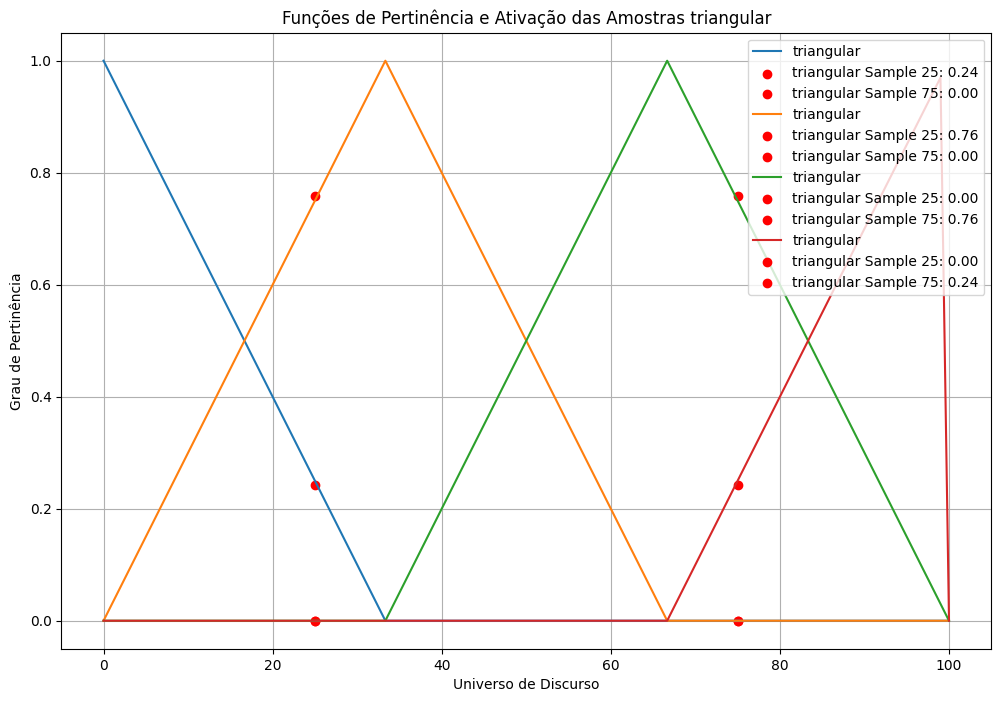

Ativação para trapezoidal com entrada 25: 0.48
Ativação para trapezoidal com entrada 75: 0.00
Ativação para trapezoidal com entrada 25: 1.00
Ativação para trapezoidal com entrada 75: 0.00
Ativação para trapezoidal com entrada 25: 0.00
Ativação para trapezoidal com entrada 75: 1.00
Ativação para trapezoidal com entrada 25: 0.00
Ativação para trapezoidal com entrada 75: 0.48


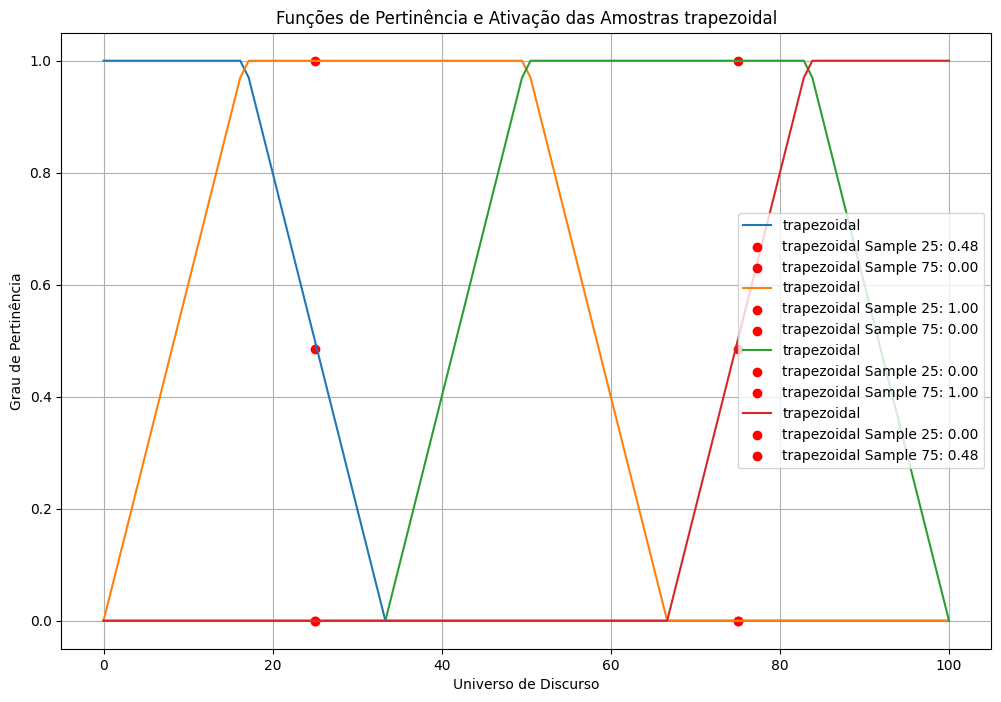

Ativação para gaussian com entrada 25: 0.32
Ativação para gaussian com entrada 75: 0.00
Ativação para gaussian com entrada 25: 0.89
Ativação para gaussian com entrada 75: 0.05
Ativação para gaussian com entrada 25: 0.05
Ativação para gaussian com entrada 75: 0.89
Ativação para gaussian com entrada 25: 0.00
Ativação para gaussian com entrada 75: 0.32


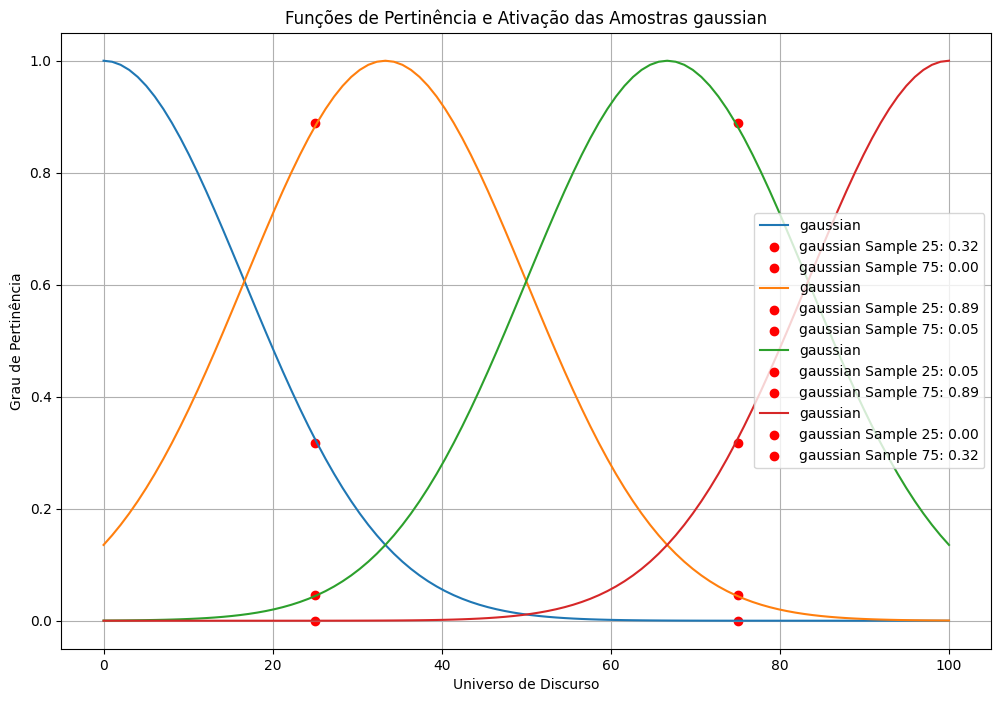

Ativação para sigmoidal com entrada 25: 1.00
Ativação para sigmoidal com entrada 75: 1.00
Ativação para sigmoidal com entrada 25: 0.00
Ativação para sigmoidal com entrada 75: 1.00
Ativação para sigmoidal com entrada 25: 0.00
Ativação para sigmoidal com entrada 75: 1.00
Ativação para sigmoidal com entrada 25: 0.00
Ativação para sigmoidal com entrada 75: 0.00


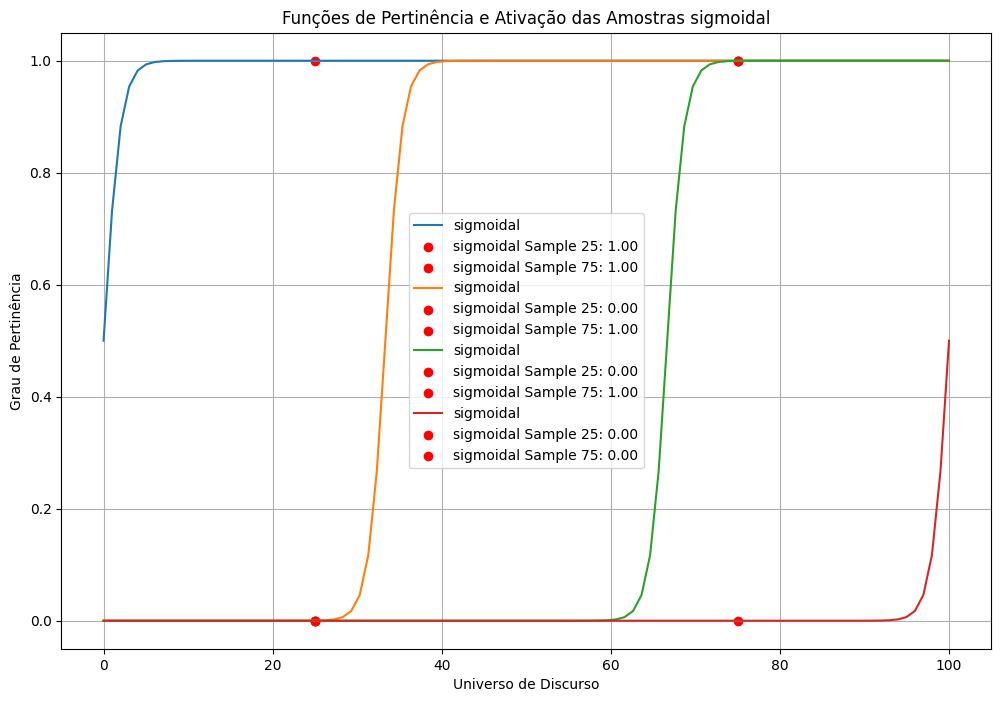

Ativação para bell com entrada 25: 0.16
Ativação para bell com entrada 75: 0.00
Ativação para bell com entrada 25: 0.95
Ativação para bell com entrada 75: 0.03
Ativação para bell com entrada 25: 0.03
Ativação para bell com entrada 75: 0.95
Ativação para bell com entrada 25: 0.00
Ativação para bell com entrada 75: 0.16


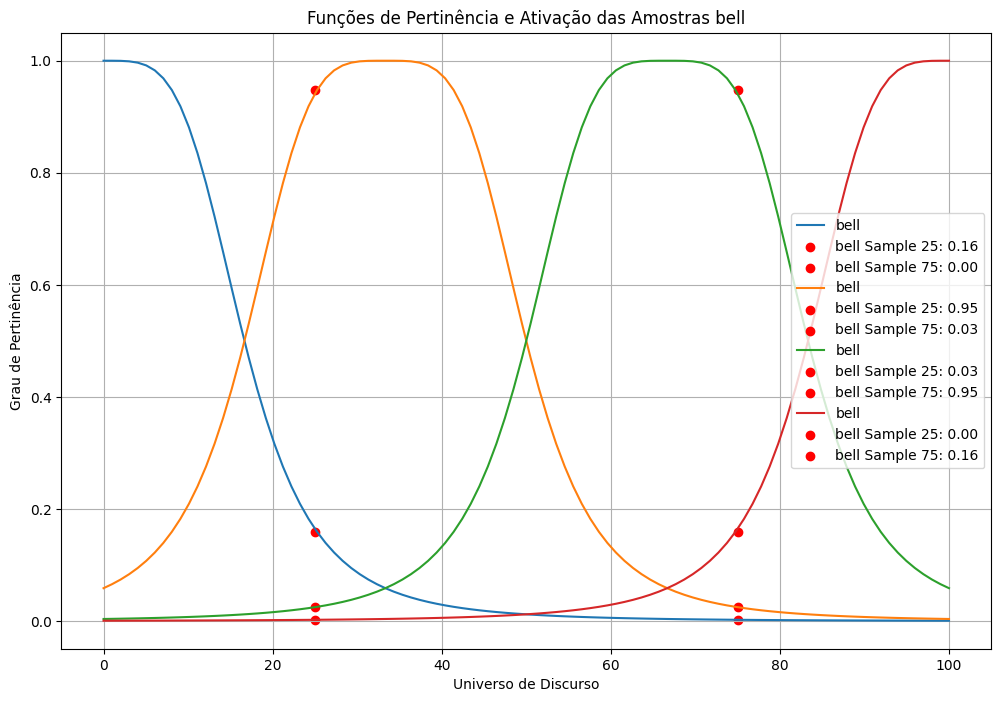

Ativação para s com entrada 25: 1.15
Ativação para s com entrada 75: 1.00
Ativação para s com entrada 25: 0.00
Ativação para s com entrada 75: 1.00
Ativação para s com entrada 25: 0.00
Ativação para s com entrada 75: 0.12
Ativação para s com entrada 25: 0.00
Ativação para s com entrada 75: 0.00


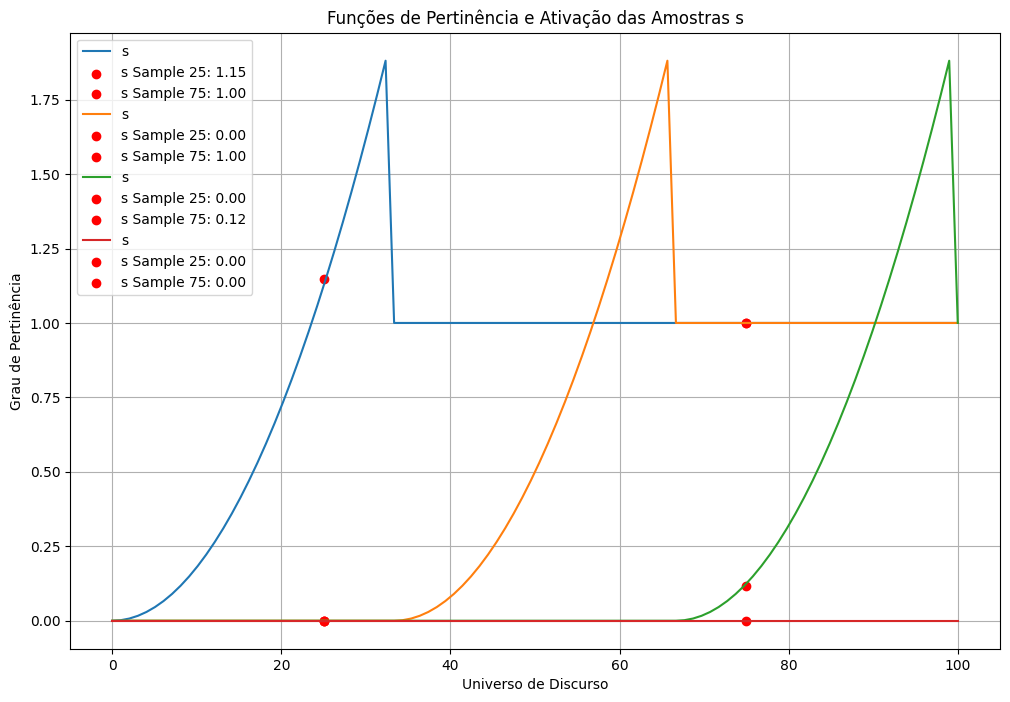

Ativação para z com entrada 25: 0.00
Ativação para z com entrada 75: 0.00
Ativação para z com entrada 25: -0.15
Ativação para z com entrada 75: 0.00
Ativação para z com entrada 25: 1.00
Ativação para z com entrada 75: 0.00
Ativação para z com entrada 25: 1.00
Ativação para z com entrada 75: 0.88


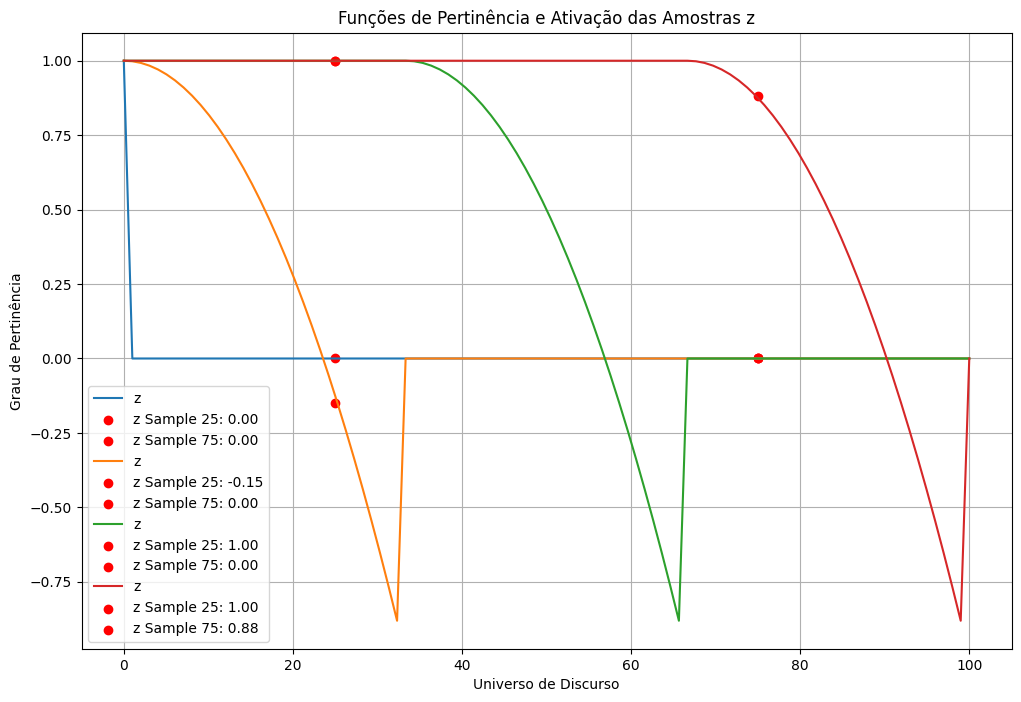

Ativação para pi com entrada 25: -0.15
Ativação para pi com entrada 75: 0.00
Ativação para pi com entrada 25: 1.15
Ativação para pi com entrada 75: 0.00
Ativação para pi com entrada 25: 0.00
Ativação para pi com entrada 75: 0.88
Ativação para pi com entrada 25: 0.00
Ativação para pi com entrada 75: 0.12


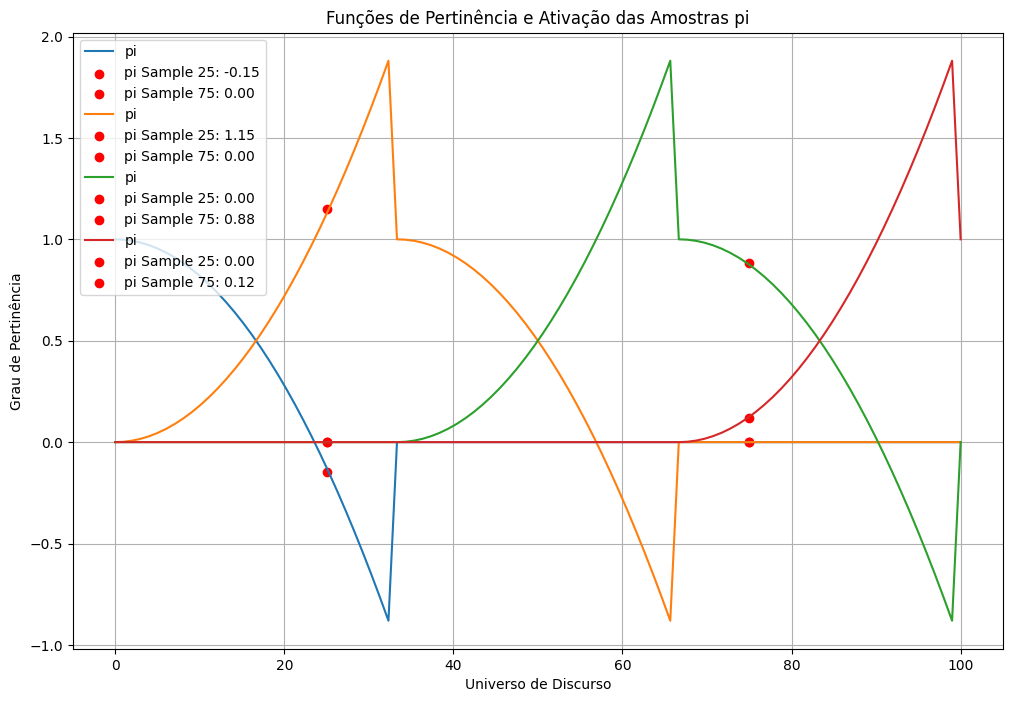

Ativação para singleton com entrada 25: 0.00
Ativação para singleton com entrada 75: 0.00
Ativação para singleton com entrada 25: 0.00
Ativação para singleton com entrada 75: 0.00
Ativação para singleton com entrada 25: 0.00
Ativação para singleton com entrada 75: 0.00
Ativação para singleton com entrada 25: 0.00
Ativação para singleton com entrada 75: 0.00


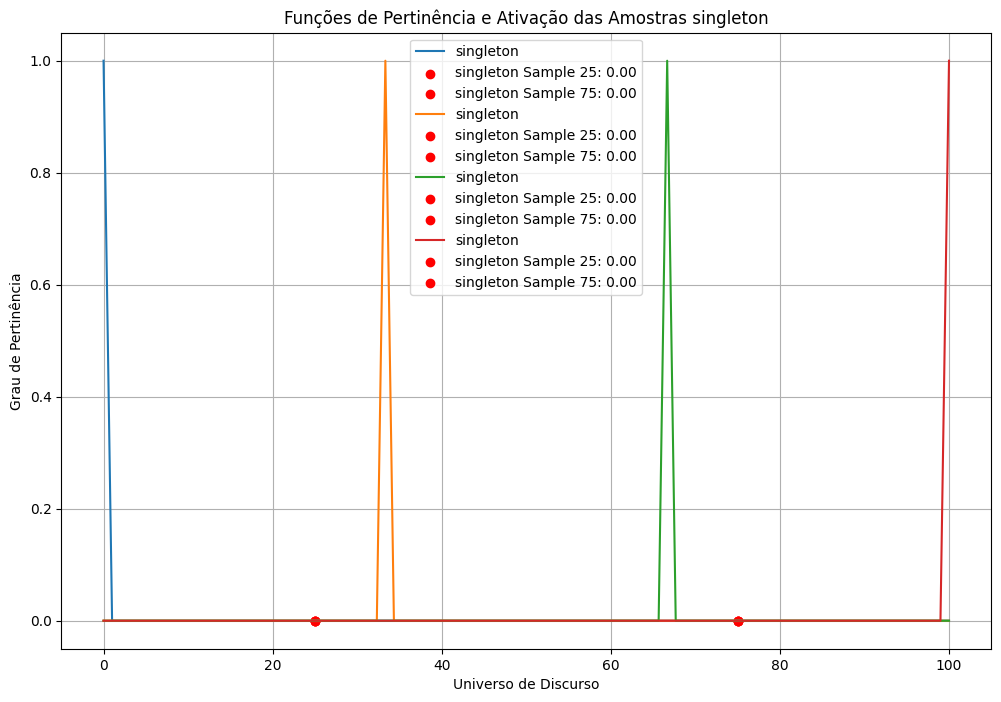

Ativação para cauchy com entrada 25: 0.30
Ativação para cauchy com entrada 75: 0.05
Ativação para cauchy com entrada 25: 0.81
Ativação para cauchy com entrada 75: 0.14
Ativação para cauchy com entrada 25: 0.14
Ativação para cauchy com entrada 75: 0.81
Ativação para cauchy com entrada 25: 0.05
Ativação para cauchy com entrada 75: 0.30


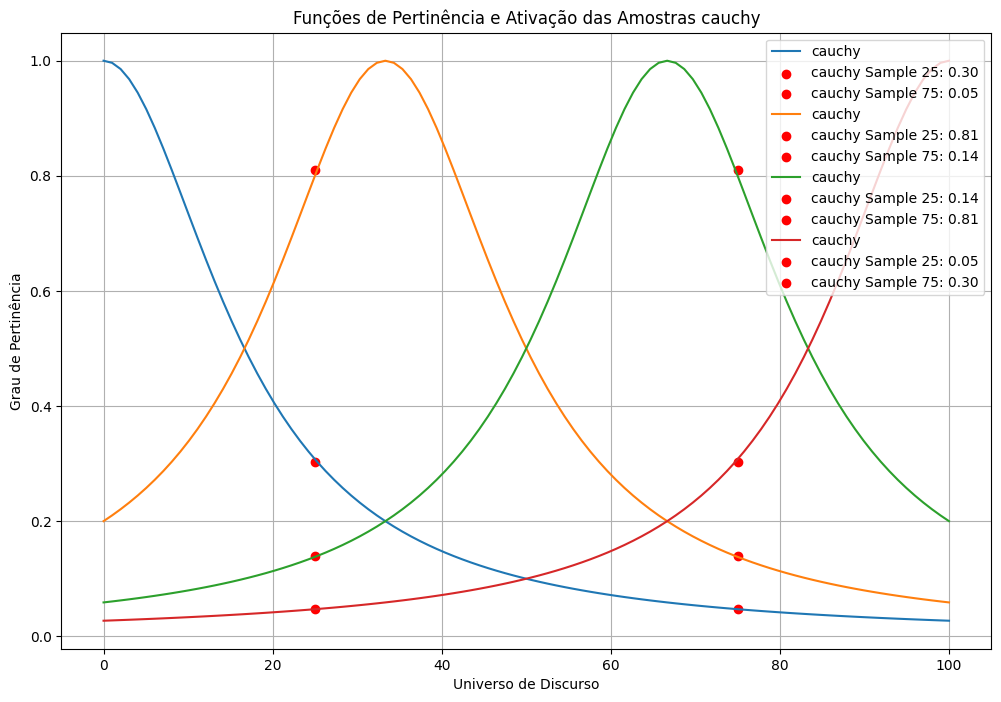

Ativação para double_gaussian com entrada 25: 0.59
Ativação para double_gaussian com entrada 75: 0.00
Ativação para double_gaussian com entrada 25: 0.59
Ativação para double_gaussian com entrada 75: 0.01
Ativação para double_gaussian com entrada 25: 0.01
Ativação para double_gaussian com entrada 75: 0.59
Ativação para double_gaussian com entrada 25: 0.00
Ativação para double_gaussian com entrada 75: 0.59


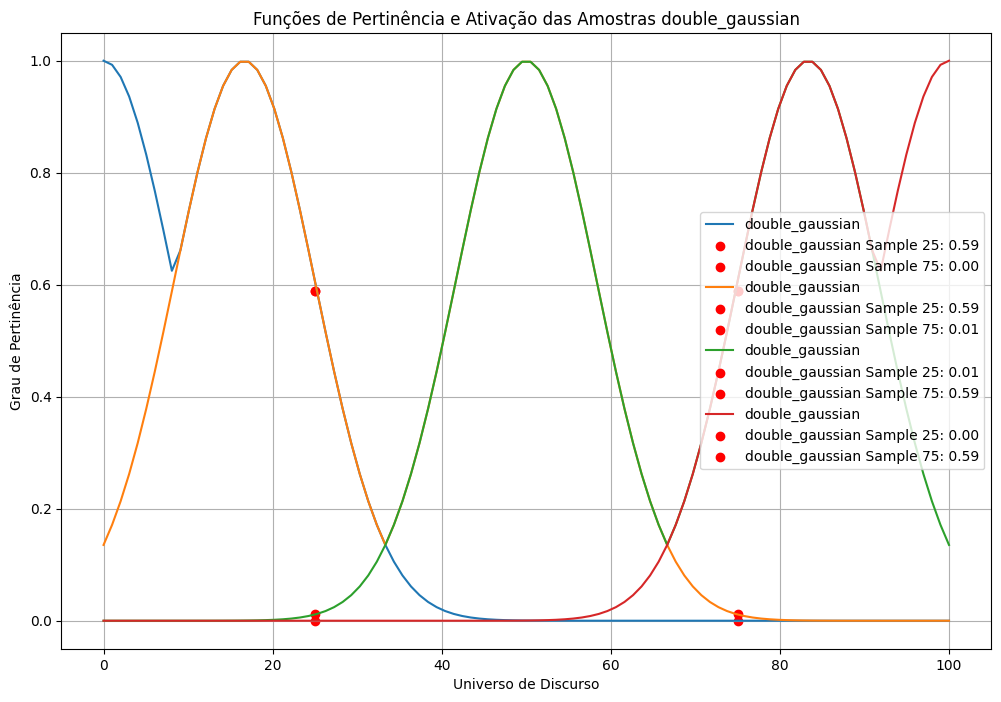

Ativação para retangular com entrada 25: 0.00
Ativação para retangular com entrada 75: 0.00
Ativação para retangular com entrada 25: 1.00
Ativação para retangular com entrada 75: 0.00
Ativação para retangular com entrada 25: 0.00
Ativação para retangular com entrada 75: 1.00
Ativação para retangular com entrada 25: 0.00
Ativação para retangular com entrada 75: 0.00


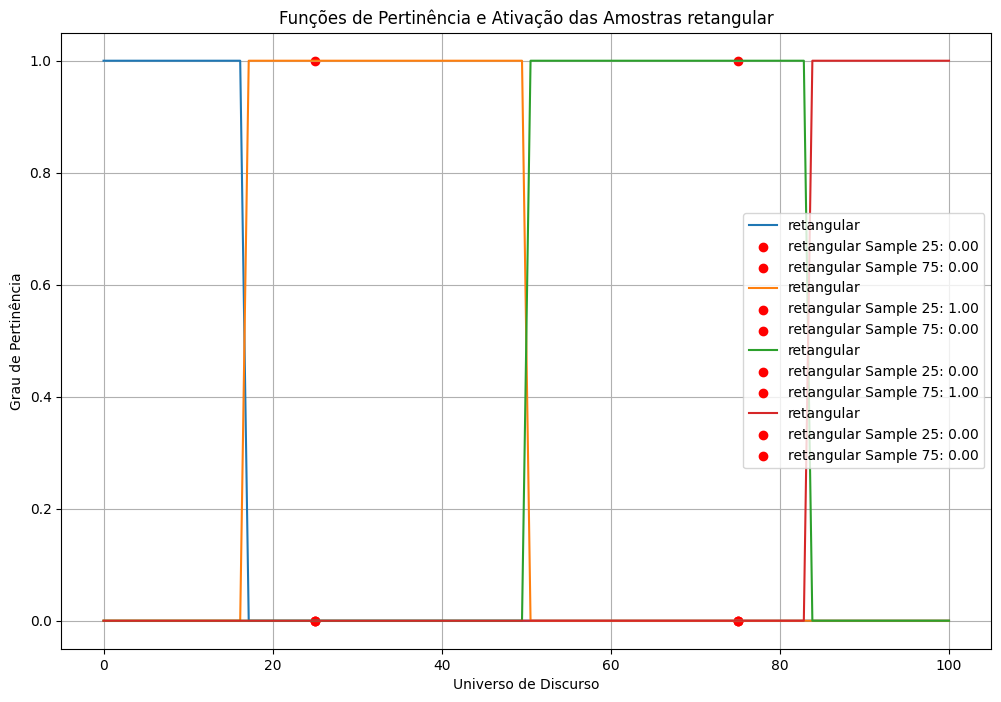

Ativação para logaritmica com entrada 25: 1.00
Ativação para logaritmica com entrada 75: 1.00
Ativação para logaritmica com entrada 25: 1.00
Ativação para logaritmica com entrada 75: 1.00
Ativação para logaritmica com entrada 25: 1.00
Ativação para logaritmica com entrada 75: 1.00
Ativação para logaritmica com entrada 25: 1.00
Ativação para logaritmica com entrada 75: 1.00


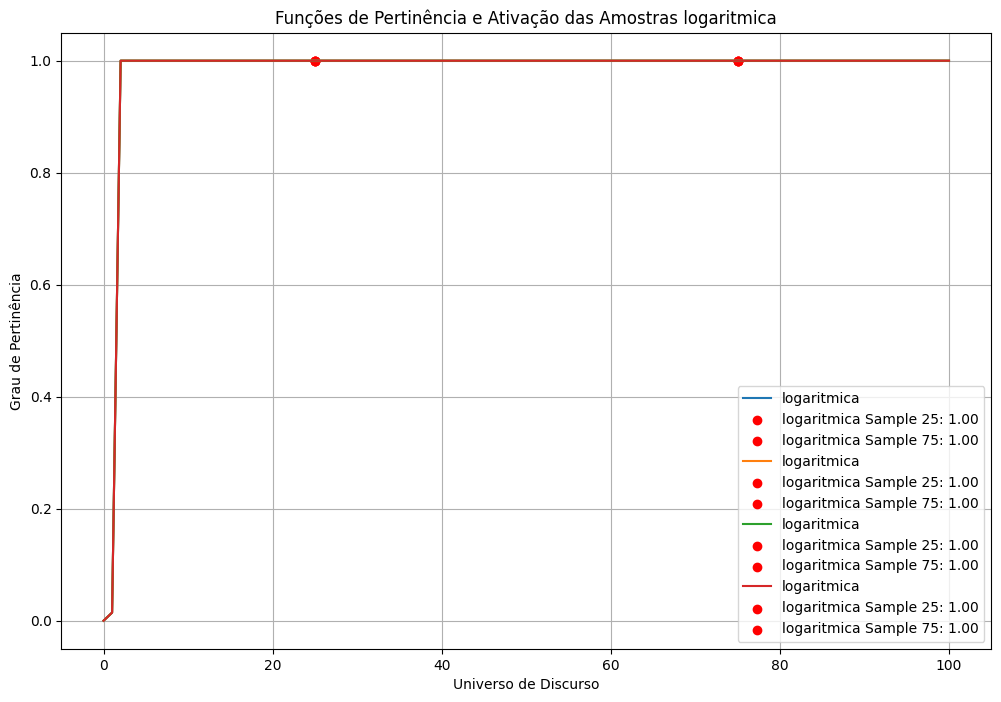

In [503]:
# Definição do universo de discurso
dominio = (0, 100)  # Intervalo do universo de discurso
samples = [25, 75]  # Amostras para fuzzificação
n = 4
funcao_pertinecia = [
    'triangular', 'trapezoidal', 'gaussian', 'sigmoidal', 'bell', 's', 'z', 'pi', 'singleton', 'cauchy', 'double_gaussian', 'retangular', 'logaritmica'
]

for type in funcao_pertinecia:
    fuzzificacao(n, type, dominio, samples, type)



# Operações Básicas no Contexto Fuzzy

## Complemento

### Zadeh

In [504]:
def complemento_zadeh(u):
    return 1 - np.array(u)

### Sugeno

In [505]:
def complemento_sugeno(u, lamb=0.5):
    return (1 - u) / (1 + lamb * u)

### Yager

In [506]:
def complemento_yager(u, w=2):
    return (1 - u**w)**(1/w)

## União (t-conormas)

### Máximo:

In [507]:
def uniao_maximo(u1, u2):
    return np.maximum(u1, u2)

### Soma Probabilística:

In [508]:
def uniao_soma_probabilistica(u1, u2):
    return u1 + u2 - u1 * u2

### Soma Limitada:

In [509]:
def uniao_soma_limitada(u1, u2):
    return np.minimum(1, u1 + u2)

### Soma Drástica:

In [510]:
def uniao_soma_drastica(u1, u2):
    return np.where((u1 == 0) & (u2 == 0), 0, np.maximum(u1, u2))

## Interseção (t-normas)

### Mínimo

In [511]:
def intersecao_minimo(u1, u2):
    return np.minimum(u1, u2)

### Produto

In [512]:
def intersecao_produto(u1, u2):
    return u1 * u2

### Produto Limitado:

In [513]:
def intersecao_produto_limitado(u1, u2):
    return np.maximum(0, u1 + u2 - 1)

### Produto Drástico:

In [514]:
def intersecao_produto_drastico(u1, u2):
    return np.where((u1 == 1) & (u2 == 1), np.minimum(u1, u2), 0)

## Analise Gráfica e textual

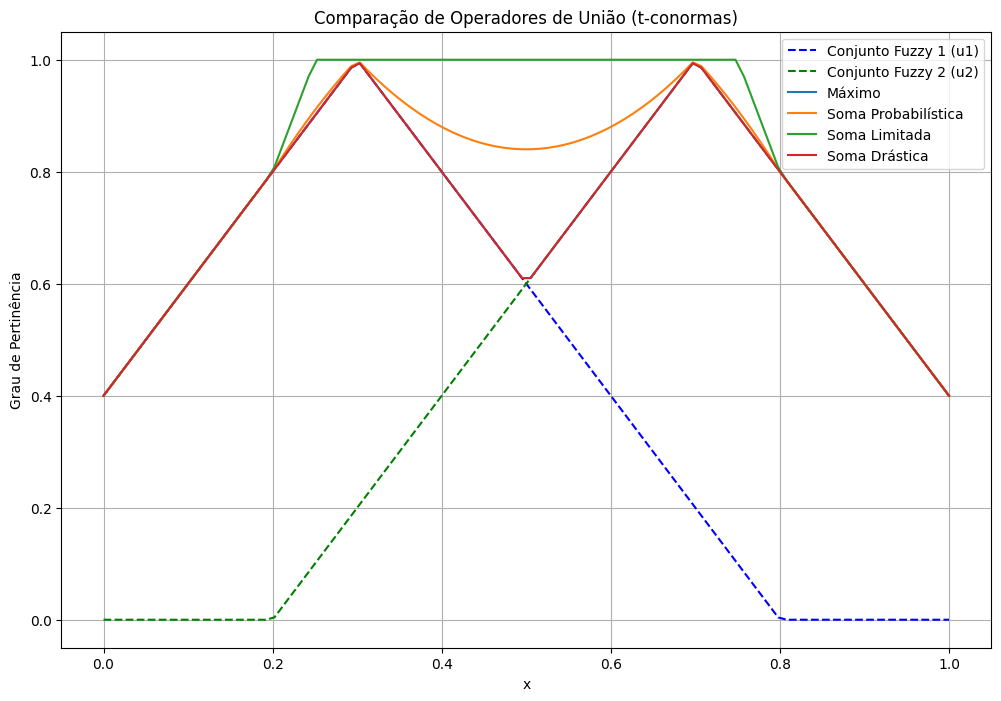

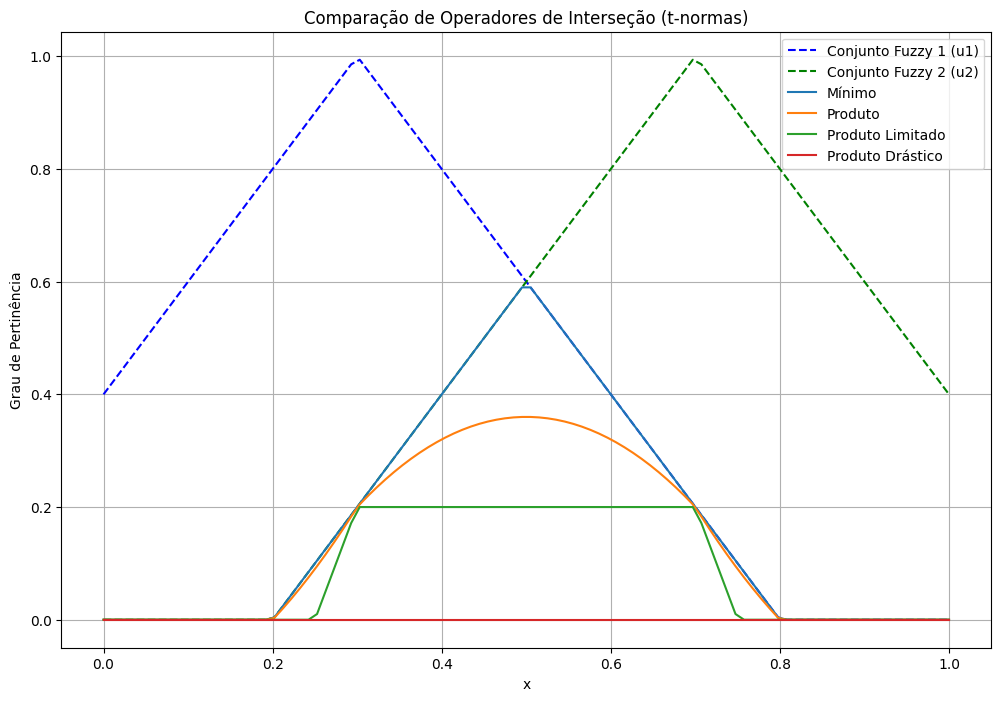

In [515]:
# Conjuntos fuzzy criados anteriormente
x = np.linspace(0, 1, 100)
u1 = np.maximum(0, 1 - 2 * abs(x - 0.3))  # Conjunto fuzzy triangular centrado em 0.3
u2 = np.maximum(0, 1 - 2 * abs(x - 0.7))  # Conjunto fuzzy triangular centrado em 0.7


# Aplicação dos operadores
operadores_uniao = {
    "Máximo": uniao_maximo(u1, u2),
    "Soma Probabilística": uniao_soma_probabilistica(u1, u2),
    "Soma Limitada": uniao_soma_limitada(u1, u2),
    "Soma Drástica": uniao_soma_drastica(u1, u2),
}

operadores_intersecao = {
    "Mínimo": intersecao_minimo(u1, u2),
    "Produto": intersecao_produto(u1, u2),
    "Produto Limitado": intersecao_produto_limitado(u1, u2),
    "Produto Drástico": intersecao_produto_drastico(u1, u2),
}

# Função para plotar os operadores
def plot_operadores(x, u1, u2, operadores, titulo):
    plt.figure(figsize=(12, 8))
    plt.plot(x, u1, label="Conjunto Fuzzy 1 (u1)", linestyle="--", color="blue")
    plt.plot(x, u2, label="Conjunto Fuzzy 2 (u2)", linestyle="--", color="green")
    for nome, resultado in operadores.items():
        plt.plot(x, resultado, label=nome)
    plt.title(titulo)
    plt.xlabel("x")
    plt.ylabel("Grau de Pertinência")
    plt.legend()
    plt.grid()
    plt.show()

# Plotando os operadores de união
plot_operadores(x, u1, u2, operadores_uniao, "Comparação de Operadores de União (t-conormas)")

# Plotando os operadores de interseção
plot_operadores(x, u1, u2, operadores_intersecao, "Comparação de Operadores de Interseção (t-normas)")


# Relações Fuzzy

## Matriz de Relação Fuzzy

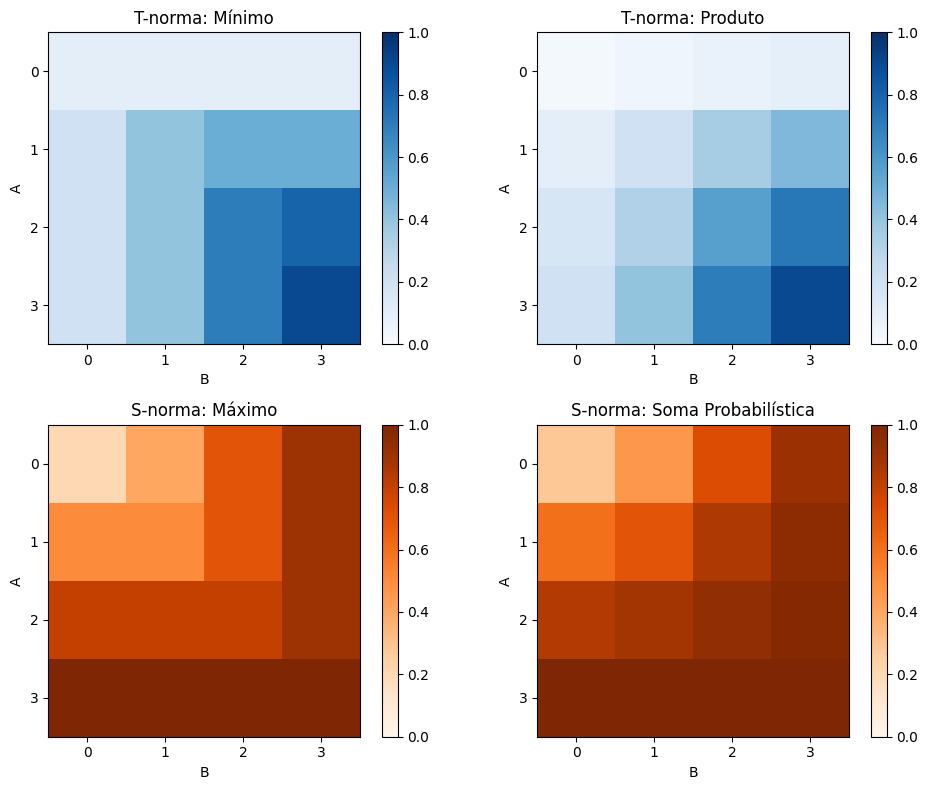

Análise comparativa das matrizes de relação fuzzy:
T-norma mínimo gera valores mais conservadores (menores), refletindo interseção forte.
T-norma produto suaviza a relação, permitindo valores intermediários.
S-norma máximo destaca a união dos conjuntos, sempre puxando para o maior grau.
S-norma soma probabilística também reflete união, mas com suavização, nunca ultrapassando 1.


In [516]:
import numpy as np
import matplotlib.pyplot as plt

# Operadores t-norma
def tnorm_min(a, b):
    return np.minimum(a, b)

def tnorm_prod(a, b):
    return a * b

# Operadores s-norma
def snorm_max(a, b):
    return np.maximum(a, b)

def snorm_prob(a, b):
    return a + b - a * b

# Função para calcular a matriz de relação fuzzy
def matriz_relacao_fuzzy(A, B, operador):
    m, n = len(A), len(B)
    R = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            R[i, j] = operador(A[i], B[j])
    return R

# Exemplos de conjuntos fuzzy
A = np.array([0.1, 0.5, 0.8, 1.0])
B = np.array([0.2, 0.4, 0.7, 0.9])

# Matrizes de relação fuzzy usando t-normas
R_min = matriz_relacao_fuzzy(A, B, tnorm_min)
R_prod = matriz_relacao_fuzzy(A, B, tnorm_prod)

# Matrizes de relação fuzzy usando s-normas
R_max = matriz_relacao_fuzzy(A, B, snorm_max)
R_prob = matriz_relacao_fuzzy(A, B, snorm_prob)

# Plotando os resultados
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
im1 = axs[0, 0].imshow(R_min, cmap='Blues', vmin=0, vmax=1)
axs[0, 0].set_title('T-norma: Mínimo')
plt.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].imshow(R_prod, cmap='Blues', vmin=0, vmax=1)
axs[0, 1].set_title('T-norma: Produto')
plt.colorbar(im2, ax=axs[0, 1])

im3 = axs[1, 0].imshow(R_max, cmap='Oranges', vmin=0, vmax=1)
axs[1, 0].set_title('S-norma: Máximo')
plt.colorbar(im3, ax=axs[1, 0])

im4 = axs[1, 1].imshow(R_prob, cmap='Oranges', vmin=0, vmax=1)
axs[1, 1].set_title('S-norma: Soma Probabilística')
plt.colorbar(im4, ax=axs[1, 1])

for ax in axs.flat:
    ax.set_xlabel('B')
    ax.set_ylabel('A')
    ax.set_xticks(range(len(B)))
    ax.set_yticks(range(len(A)))

plt.tight_layout()
plt.show()

# Análise comparativa
print("Análise comparativa das matrizes de relação fuzzy:")
print("T-norma mínimo gera valores mais conservadores (menores), refletindo interseção forte.")
print("T-norma produto suaviza a relação, permitindo valores intermediários.")
print("S-norma máximo destaca a união dos conjuntos, sempre puxando para o maior grau.")
print("S-norma soma probabilística também reflete união, mas com suavização, nunca ultrapassando 1.")

# Composição de Relação Fuzzy

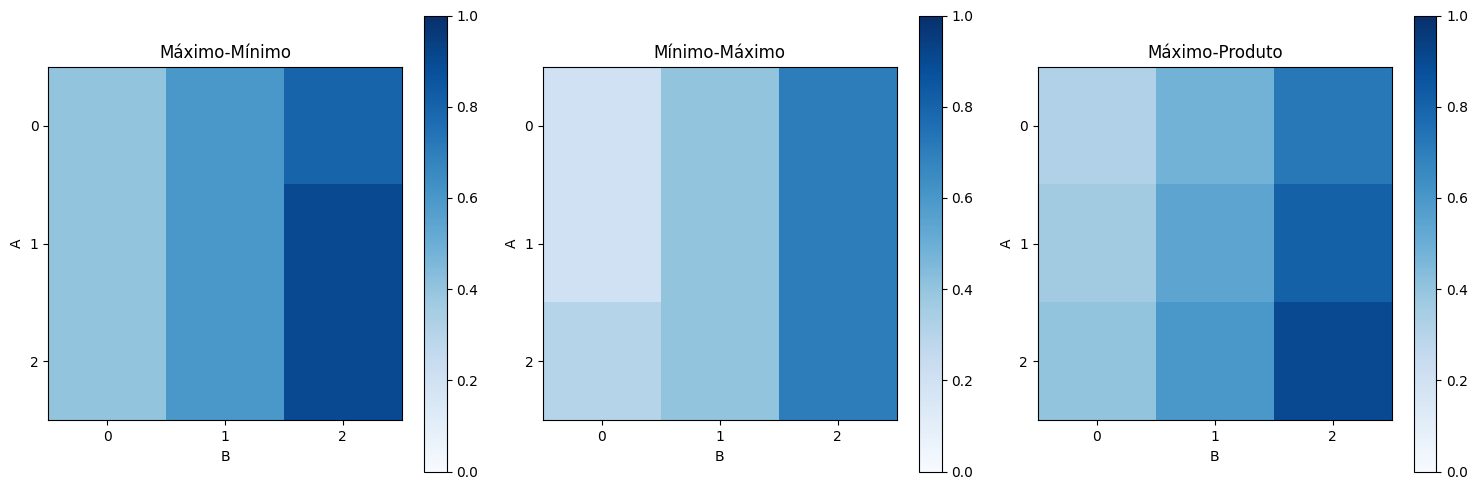

Análise comparativa das composições de relação fuzzy:
Máximo-Mínimo: Reflete a interseção mais conservadora entre os conjuntos.
Mínimo-Máximo: Reflete a união mais conservadora entre os conjuntos.
Máximo-Produto: Permite suavização, considerando o produto dos graus de pertinência.


In [517]:
import numpy as np
import matplotlib.pyplot as plt

# Função Máximo-Mínimo
def maximo_minimo(A, B):
    m, n = A.shape[0], B.shape[1]
    R = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            R[i, j] = np.max(np.minimum(A[i, :], B[:, j]))
    return R

# Função Mínimo-Máximo
def minimo_maximo(A, B):
    m, n = A.shape[0], B.shape[1]
    R = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            R[i, j] = np.min(np.maximum(A[i, :], B[:, j]))
    return R

# Função Máximo-Produto
def maximo_produto(A, B):
    m, n = A.shape[0], B.shape[1]
    R = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            R[i, j] = np.max(A[i, :] * B[:, j])
    return R

# Exemplos de matrizes fuzzy
A = np.array([[0.1, 0.5, 0.8], [0.2, 0.6, 0.9], [0.3, 0.7, 1.0]])
B = np.array([[0.2, 0.4, 0.7], [0.3, 0.5, 0.8], [0.4, 0.6, 0.9]])

# Aplicação das composições
R_max_min = maximo_minimo(A, B)
R_min_max = minimo_maximo(A, B)
R_max_prod = maximo_produto(A, B)

# Plotando os resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
im1 = axs[0].imshow(R_max_min, cmap='Blues', vmin=0, vmax=1)
axs[0].set_title('Máximo-Mínimo')
plt.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(R_min_max, cmap='Blues', vmin=0, vmax=1)
axs[1].set_title('Mínimo-Máximo')
plt.colorbar(im2, ax=axs[1])

im3 = axs[2].imshow(R_max_prod, cmap='Blues', vmin=0, vmax=1)
axs[2].set_title('Máximo-Produto')
plt.colorbar(im3, ax=axs[2])

for ax in axs:
    ax.set_xlabel('B')
    ax.set_ylabel('A')
    ax.set_xticks(range(B.shape[1]))
    ax.set_yticks(range(A.shape[0]))

plt.tight_layout()
plt.show()

# Análise comparativa
print("Análise comparativa das composições de relação fuzzy:")
print("Máximo-Mínimo: Reflete a interseção mais conservadora entre os conjuntos.")
print("Mínimo-Máximo: Reflete a união mais conservadora entre os conjuntos.")
print("Máximo-Produto: Permite suavização, considerando o produto dos graus de pertinência.")